
- Describe the basic `keras` workflow.
- Train regression and classification neural networks using `keras`

**Overview**

`keras` is a convenience layer over `tensorflow`.  Let's review the workflow we had yesterday in `tensorflow`:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

The "big" steps were 5 and 6.

- 5 Build the network by creating linked `dense` layers.
- 6 Iterate over epochs (and possibly batches), explicitly calling on the session to execute a "training op"

In `keras` these to steps are simplified.

- 5 Add layers to a "model".
- 6 Compile and fit the model. (as little as 2 lines of code!)

---

**Regardless of the tool that you are using**, keep in mind the following concepts:

- What will your network topology (number of hidden layers and units per layer) be?
- What activation function will you use for the hidden layers?
- Based on your model, how many units will be in your input and output layers?
- Based on your model, what will the activation function on your output layer be?
- What will your loss function be?
- What optimizer will you use for the gradient descent/backpropogation?

## Regression Model

In [93]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

%matplotlib inline

In [94]:
data = load_diabetes()
print(data.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

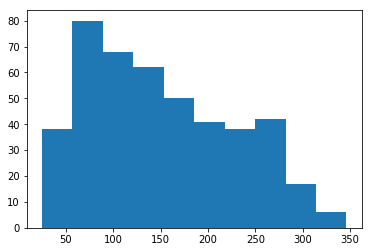

In [95]:
plt.hist(data.target)

Note that the data matrix (i.e., input features) are stored in `data.data`; the target values are stored in `data.target`.

To prepare your data...

1. Split your data into train and test sets.
2. Standardize your data.

> Note that the description indicate that these data have already been scaled.  Let's go through the motions and scale explicitly here, since you typically will _not_ have someone else scaling your data for you.  Hey, **your're** the data scientist!

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train.shape

(331, 10)

In [97]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()

In [30]:
input_units = X_train.shape[1]
hidden_units = input_units

model.add(Dense(hidden_units, input_dim=input_units, activation='relu'))
model.add(Dense(1))

In [31]:
from keras.optimizers import Adam

#model.compile(loss='mean_squared_error', optimizer='adam')

adam = Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)

In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=None)

Train on 331 samples, validate on 111 samples
Epoch 1/10
331/331 [==============================] - 0s 1ms/step - loss: 29328.7836 - val_loss: 27094.6433
Epoch 2/10
331/331 [==============================] - 0s 62us/step - loss: 28840.9669 - val_loss: 26537.2202
Epoch 3/10
331/331 [==============================] - 0s 63us/step - loss: 28246.0317 - val_loss: 25801.9425
Epoch 4/10
331/331 [==============================] - 0s 67us/step - loss: 27437.8449 - val_loss: 24866.5042
Epoch 5/10
331/331 [==============================] - 0s 56us/step - loss: 26387.7581 - val_loss: 23708.3348
Epoch 6/10
331/331 [==============================] - 0s 57us/step - loss: 25185.3638 - val_loss: 22296.7201
Epoch 7/10
331/331 [==============================] - 0s 54us/step - loss: 23684.6979 - val_loss: 20719.2322
Epoch 8/10
331/331 [==============================] - 0s 62us/step - loss: 22043.4437 - val_loss: 18982.7087
Epoch 9/10
331/331 [==============================] - 0s 67us/step - loss: 20244.51

## Binary Classification

In [33]:
from sklearn.datasets import load_breast_cancer

In [48]:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

y_train = y_train*-1 + 1
y_test = y_test*-1 + 1

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train.shape

(426, 30)

In [64]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [66]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
              epochs=100, batch_size=None, verbose=0)

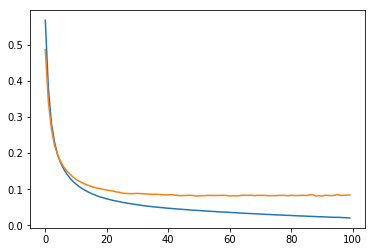

In [67]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')

In [52]:
model.predict(X_test)

array([[0.92900413],
       [0.9964259 ],
       [0.02867264],
       [0.98321646],
       [0.16529997],
       [0.15859506],
       [0.99926597],
       [0.0484082 ],
       [0.999438  ],
       [0.02060333],
       [0.31216264],
       [0.77459913],
       [0.0169151 ],
       [0.85980725],
       [0.98298705],
       [0.05519833],
       [0.04788474],
       [0.07193275],
       [0.98623395],
       [0.99936205],
       [0.01519812],
       [0.01591475],
       [0.73180324],
       [0.8626274 ],
       [0.01101013],
       [0.02336749],
       [0.02640323],
       [0.10453156],
       [0.9968874 ],
       [0.23975293],
       [0.01097879],
       [0.30213377],
       [0.9631282 ],
       [0.07899531],
       [0.03255795],
       [0.06211685],
       [0.75959647],
       [0.99258727],
       [0.9915872 ],
       [0.9820655 ],
       [0.07709561],
       [0.8887719 ],
       [0.08101358],
       [0.07074103],
       [0.9470742 ],
       [0.3246475 ],
       [0.00793783],
       [0.545

## Multi-Class Classification

In [98]:
from sklearn.datasets import load_iris
from keras.utils import to_categorical

In [99]:
data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(y_train.shape)

(112, 4)
(112, 3)


In [100]:
import numpy as np
np.unique(y_train)

array([0., 1.])

In [101]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = 3

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(n_output, activation='softmax'))

In [102]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=400, batch_size=None, verbose=0)

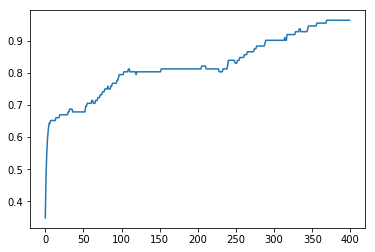

In [105]:
plt.plot(history.history['acc'])

In [107]:
history.history['acc'][-1]

0.9642857142857143

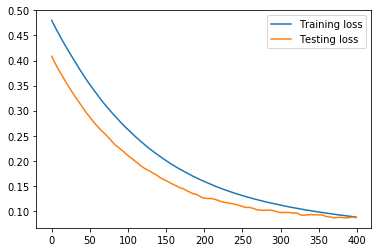

In [86]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()